In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime

In [2]:
df=pd.read_csv(r'house_prices_synthetic.csv')
df.head()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price
0,4,1.6,799,0.62,56347,1.93,18,1980,1980,3.25,1.25,254036.40
1,5,1.9,638,0.67,128725,0.89,18,1959,1972,3.85,1.44,290828.33
2,3,3.6,858,0.89,133844,1.44,21,2005,2017,3.56,0.55,307291.91
3,5,2.0,2022,0.60,121321,1.45,26,2019,2040,5.45,0.51,450113.10
4,5,1.9,3956,0.65,79056,1.26,16,1969,1969,5.72,1.16,780451.24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bedrooms             1000 non-null   int64  
 1   Bathrooms            1000 non-null   float64
 2   SquareFootage        1000 non-null   int64  
 3   LotSize              1000 non-null   float64
 4   MedianIncome         1000 non-null   int64  
 5   PropertyTaxRate      1000 non-null   float64
 6   ProximityCityCenter  1000 non-null   int64  
 7   YearBuilt            1000 non-null   int64  
 8   LastRenovationYear   1000 non-null   int64  
 9   InterestRate         1000 non-null   float64
 10  DemandIndex          1000 non-null   float64
 11  Price                1000 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 93.9 KB


In [4]:
df.describe()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.004000,2.483700,2830.851000,0.518950,90751.969000,1.463680,15.06300,1986.900000,1993.547000,3.988700,1.004010,590375.191200
std,1.433192,0.855053,1280.926931,0.273001,35681.233019,0.574503,8.26979,21.329063,25.217369,1.126332,0.286503,195555.743686
min,1.000000,1.000000,502.000000,0.050000,30060.000000,0.500000,1.00000,1950.000000,1950.000000,2.000000,0.500000,156857.700000
25%,2.000000,1.700000,1751.500000,0.280000,59220.250000,0.970000,8.00000,1968.750000,1973.000000,3.060000,0.750000,430021.652500
50%,3.000000,2.500000,2950.500000,0.510000,91659.500000,1.450000,15.00000,1986.000000,1993.000000,3.985000,1.000000,600934.570000
75%,4.000000,3.200000,3971.750000,0.750000,122961.750000,1.950000,22.00000,2006.000000,2013.000000,4.940000,1.260000,755478.127500
max,5.000000,4.000000,4998.000000,1.000000,149875.000000,2.500000,29.00000,2022.000000,2071.000000,6.000000,1.500000,962130.020000


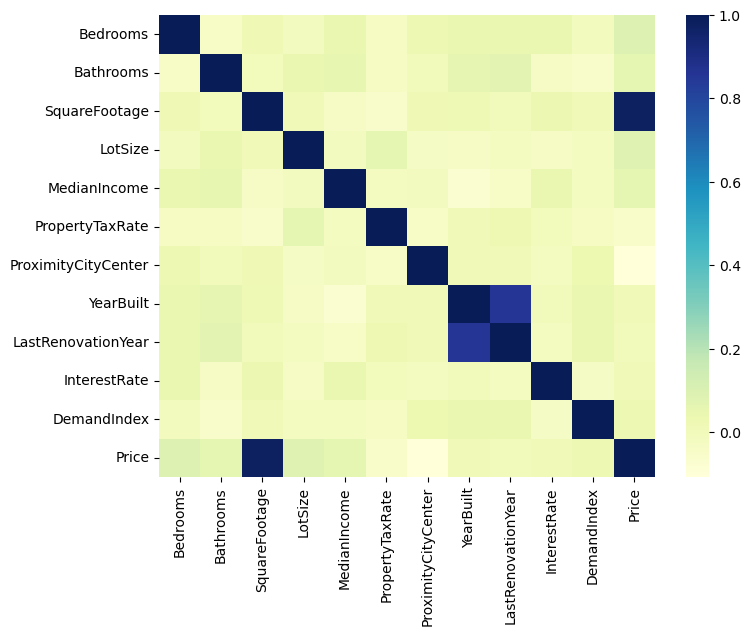

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=False, cmap="YlGnBu")
plt.show()

In [7]:
x=df.drop("Price", axis=1)
y=df["Price"] 

#standard scaler
scaler= StandardScaler()

scaled_data= scaler.fit_transform(x)

In [10]:
#splitting the data
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42) 

In [11]:
#Regression on the train dataset
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
#prediction on the test set
y_pred= model.predict(x_test)
y_pred

array([557561.91074363, 845243.06646863, 569410.2236941 , 804721.39124565,
       644001.14629629, 316386.65821883, 753946.02415611, 311406.11489017,
       752502.52609333, 427165.9510987 , 312097.13410753, 766091.95093519,
       267568.55929562, 506044.32535656, 306114.99433196, 714437.47921131,
       285812.49572469, 804001.00914511, 399418.60747534, 593678.87171728,
       696753.56543756, 391599.86539235, 335605.71381055, 325719.88810089,
       588991.39808113, 307259.62900163, 703279.94776778, 210215.98378913,
       858335.8340422 , 591625.93005503, 799044.19885392, 847194.36264551,
       828873.46999315, 689591.35297685, 657125.26251647, 563773.17200261,
       609936.9498472 , 399077.9752448 , 673616.54966832, 931765.0436195 ,
       469295.11352108, 708195.69579997, 379633.93852532, 777282.16874252,
       751850.14270761, 749625.02919249, 474339.5160533 , 599971.78747073,
       826823.85173314, 683839.26580171, 325848.01856861, 591888.36884602,
       560393.31489659, 4

In [13]:
#the coefficients of every column
print("coefficients: \n", model.coef_)

coefficients: 
 [ 1.01512842e+04  1.49997724e+04  1.49796920e+02  5.00698789e+04
  5.05995582e-01  1.05599878e+03 -2.99099852e+03 -1.37348161e+02
  7.65736065e+01 -4.59974273e+03  2.07318386e+04]


In [14]:
#the intercept
print("intercept", model.intercept_)

intercept 187965.49477725674


In [15]:
#the mean squared error
print("Mean squared error:", mean_squared_error(y_test,y_pred))

Mean squared error: 132420047.1333134


In [16]:
#the mean absolute error
print("mean absolute error", mean_absolute_error(y_test,y_pred))

mean absolute error 9764.702809701841


In [17]:
r2=r2_score(y_test,y_pred)
print("R2 score:", r2)

R2 score: 0.9965741383249159
